# Project Phase 2
### Samantha Rubin, Hanwen Lin, Liz Espinoza, and Hanna Kang

## Research questions:
- Is there a relationship between wealth inequality (Gini index) and high rates of positive COVID cases in relation to the total population and/or COVID deaths across different countries?
- Is there a relationship between GDP per capita and high rates of positive COVID cases in relation to the total population and/or COVID deaths across different countries?
- Is there a relationship between the ratio of positive COVID results to COVID deaths and a country’s GDP and/or Gini index?


-----
## Data collection and cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data is imported below.

In [2]:
raw_covid = pd.read_csv("jrc-covid-19-world-latest.csv")
gini_data = pd.read_csv("gini_data2.csv")
gdp_data = pd.read_csv("gdp_data.csv")
pop_data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_2106202.csv")
pop_den = pd.read_csv("pop_density.csv")
unemploy_rates = pd.read_csv("unemployment_rates.csv")
#avg_households = pd.read_csv("avg_house.csv")

For gdp_data and gini_data, what should be the column labels are actually stored in the third row, and the data starts on the fourth row.  We fix this below.

In [3]:
gdp_data.columns = gdp_data.loc[3]
gdp_data = gdp_data.drop(index = [0,1,2,3])

Removing unnecessary columns and renaming them:

In [9]:
#making covid data column names lowercase
new_colnames = [i.lower() for i in raw_covid.columns]
covid_cases = raw_covid.copy()
for i in covid_cases.columns:
    covid_cases.columns = new_colnames
# #dropping unnecessary columns:
# covid_cases = covid_cases[['date', 'iso3', 'continent', 'countryname'
#                            , 'cumulativepositive', 'cumulativedeceased', 'cumulativerecovered'
#                            , 'currentlypositive', 'hospitalized', 'intensivecare']]
# #renaming columns
# covid_cases.rename(columns = {'iso3':'country_code','countryname':'country_name'
#                               , 'cumulativepositive':'cumulative_pos', 'cumulativedeceased':'cumulative_dec'
#                               , 'cumulativerecovered':'cumulative_rec', 'currentlypositive':'curr_pos'
#                               , 'intensivecare':'intensive_care'}, inplace = True)


#dropping unnecessary columns:
covid_cases = covid_cases[['date', 'iso3', 'continent', 'countryname'
                           , 'cumulativepositive', 'cumulativedeceased'
                           , 'currentlypositive']]
#renaming columns
covid_cases.rename(columns = {'iso3':'country_code','countryname':'country_name'
                              , 'cumulativepositive':'cumulative_pos', 'cumulativedeceased':'cumulative_dec'
                              , 'currentlypositive':'curr_pos'}, inplace = True)



#clean gdp data, drop unecessary columns and rename them
new_colnames = []
gdp = gdp_data.copy()
gdp.rename(columns = {"Country Name":"country_name","Country Code":"country_code",2019:"gdp_per_cap"}, inplace = True)
gdp = gdp[["country_name","country_code","gdp_per_cap"]]

#drop NaNs in gdp
gdp = gdp.dropna(axis = 0,subset=["gdp_per_cap"])

#clean gini column names
gini_data.rename(columns = {"Country Code":"country_code",
                          "Country":"country","Value":"gini_index",'Year':"gini_year"},inplace = True)

#clean population data
pop_data.rename(columns = {"Country Code":"country_code","Country Name":"country_name","2019":"population"}
                ,inplace = True)
pop_data = pop_data[["country_code",'country_name','population']]

#clean population density 
pop_den.rename(columns = {"Country Code":"country_code","Country Name":"country_name","2018":"density"}
               ,inplace = True)
pop_den = pop_den[['country_code','country_name','density']]

#clean unemployment rates 
unemploy_rates.rename(columns = {"Country Code":"country_code","Country Name":"country_name","2019":"rates"}
                      ,inplace = True)
unemploy_rates = unemploy_rates[['country_code','country_name','rates']]

#clean average households 
# avg_households.rename(columns = {"Country Code":"country_code","Country Name":"country_name","2019":"size"}
#                       ,inplace = True)
# avg_households = avg_households[['country_code','country_name','size']]



Matching countries via country codes, only keeping the countries that have GDP, gini, and covid data. We printed the length to see how many countries were dropped

In [15]:
#adding gdp 
covid_gdp = pd.merge(left = covid_cases, right = gdp, left_on = "country_code",right_on = "country_code")
print(len(covid_gdp))

#adding gini
covid_gdp_gini = pd.merge(left = covid_gdp, right = gini_data, left_on = "country_code",right_on = "country_code")
print(len(covid_gdp_gini))

#adding population 
covid_gdp_gini = pd.merge(left = covid_gdp_gini, right = pop_data, left_on = "country_code",right_on = "country_code")
print(len(covid_gdp_gini))

#adding population density
covid_gdp_gini = pd.merge(left = covid_gdp_gini, right = pop_den, left_on = "country_code",right_on = "country_code")
print(len(covid_gdp_gini))

#adding unemployment rates
covid_data = pd.merge(left = covid_gdp_gini, right = unemploy_rates, left_on = "country_code",right_on = "country_code")
print(len(covid_data))

#adding average households
# covid_data = pd.merge(left = covid_gdp_gini, right = avg_households, left_on = "country_code",right_on = "country_code")
# print(len(covid_data))



#removing duplicate columns
covid_data = covid_data.drop(columns = ["country",'country_name_y',"country_name"])
covid_data.rename(columns = {"country_name_x":"country_name"},inplace = True)

166
140
140
136
136


In [18]:
covid_data.rename(columns = {'density':'pop_density', 'rates': 'unemploy_rates'}, inplace = True)

covid_data.drop_duplicates(subset = 'country_name', keep = 'first', inplace = True)

covid_data.head()

,date,country_code,continent,country_name,cumulative_pos,cumulative_dec,curr_pos,gdp_per_cap,gini_index,gini_year,country_name,population,pop_density,unemploy_rates
0,2021-03-13,ALB,EU,Albania,116821,2030,34970.0,5353.244856,29.0,2012,Albania,2854191.0,104.6122628,11.47000027
1,2021-02-15,DZA,AF,Algeria,110711,2939,107772.0,3973.964072,27.6,2011,Algeria,43053054.0,17.73006763,11.81000042
2,2021-02-15,AGO,AF,Angola,20366,492,19874.0,2790.726615,42.7,2008,Angola,31825295.0,24.71305206,6.929999828
3,2021-02-15,ARG,SA,Argentina,2029008,50327,1978681.0,9912.281809,41.2,2017,Argentina,44938712.0,16.2585101,9.840000153
4,2021-02-15,AUS,OC,Australia,28900,909,27991.0,55060.326100,35.8,2014,Australia,25364307.0,3.24787091,5.159999847


## Data Description

 There is not a lot of information on the relationship between wealth inequality (quantified by the Gini index) or GDP per capita, and high rates of positive COVID-19 cases and/or COVID-19 deaths across different countries. This is especially the case as COVID-19 is still ongoing to the present day. To address this, we have chosen to analyze three datasets. The first dataset contains data from the Joint Research Centre (JRC), which was made to further understand COVID-19, to predict any potential impacts, and to support future planning. Included columns are cumulative positive and cumulative recovered COVID-19 cases, as well as cumulative deceased and the number of hospitalized and intensive care patients. Rows in this dataset include the names of countries and their respective country codes. 
     The other two datasets are simpler, only having data of country names and codes, and either the respective Gini indexes or the GDP per capita. These were created to look at all of the Gini indexes and GDP per capita of countries. We will only be analyzing countries that have both of these values, and are also on the COVID-19 dataset. 
     Analysis on these datasets will help to find potential relationships between COVID-19 cases and the Gini indexes and GDP per capita of countries. Through this, we hope to determine how the wealth of a country changes how it has been affected by COVID-19.

Here is a shared Google Drive folder with all four of our raw datasets:
https://drive.google.com/drive/folders/1OAunMYE2SKDuoehcmpewYIPKlBWcg3fU?usp=sharing 
The data was sourced from the following sites:
Covid data source: https://github.com/ec-jrc/COVID-19/blob/master/data-of-world/jrc-covid-19-world-latest.csv  
This dataset contains COVID-19 data of each country in the world, with columns such as cumulative positive cases and hospitalizations.  

Gini index data source: https://data.worldbank.org/indicator/SI.POV.GINI/?end=2018&start=2015 
This dataset contains the Gini index for each country for which it is available.

GDP per capita data source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 
note: for this data set, we had to remove the final column (2020), which had no data in it to avoid errors.  This dataset contains the gross domestic product per capita of each country.

Population data source: https://data.worldbank.org/indicator/SP.POP.TOTL 

## Data Limitations

- Not all countries have reported a Gini index or GDP per capita value, so this is not representative of the whole world.  
- Some countries’ Gini indexes are up-to-date, while some countries’ are not.
- Some countries with low GDP per capita and/or low Gini indices may also have low life expectancies due to many social, political and environmental factors. A country’s high Covid death rate may thus also be influenced by its low life expectancy.
- Some countries might have less accurate COVID data than others.
- Because the original dataset is updated daily, the dataset we have saved will not have all current COVID data, and may not be accurate to the present day. 


------
## Exploratory Data Analysis

Scatterplot of cumulative positive cases vs population

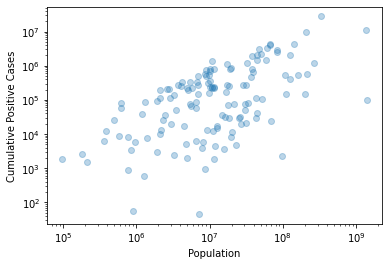

In [13]:
plt.axes(xscale = "log", yscale = "log")
plt.scatter(x = covid_data["population"],y = covid_data["cumulative_pos"], alpha = 0.3)
plt.xlabel("Population")
plt.ylabel("Cumulative Positive Cases")
plt.show()

Above we can see that population and cumulative positive cases are positively correlated.  To account for this, we make 2 new columns, cumulative positive COVID cases by country normalized by the population of each country, and cumulative COVID deaths normalized by population.

In [15]:
cpos_norm = []
for i in range(len(covid_data.cumulative_pos)):
    cpos_norm.append(covid_data.cumulative_pos[i]/covid_data.population[i])
covid_data['cpos_norm'] = cpos_norm

cdec_norm = []
for i in range(len(covid_data.cumulative_dec)):
    cdec_norm.append(covid_data.cumulative_dec[i]/covid_data.population[i])
covid_data['cdec_norm'] = cdec_norm

Histogram of GDP per capita:

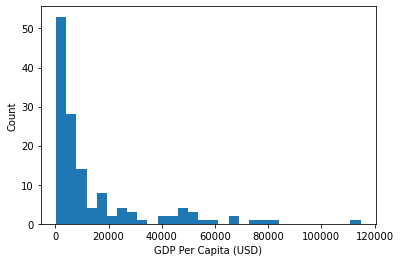

In [16]:
plt.hist(covid_data["gdp_per_cap"], bins = 30)
plt.xlabel("GDP Per Capita (USD)")
plt.ylabel("Count")
plt.show()

This data is very right skewed. 

Histogram of Gini index:

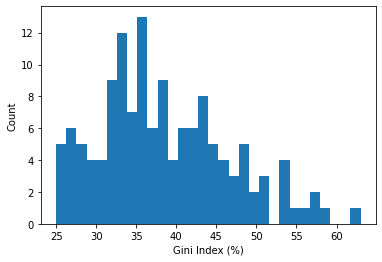

In [18]:
plt.hist(covid_data["gini_index"], bins = 30)
plt.xlabel("Gini Index (%)")
plt.ylabel("Count")
plt.show()

This data is close to normally distributed, with a slight right skew. 

Histogram of cumulative positive cases per capita

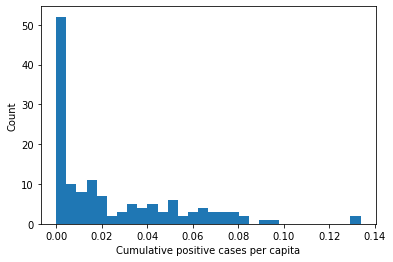

In [11]:
plt.hist(covid_data["cpos_norm"], bins = 30)
plt.xlabel("Cumulative positive cases per capita")
plt.ylabel("Count")
plt.show()

Histogram of cumulative deaths per capita

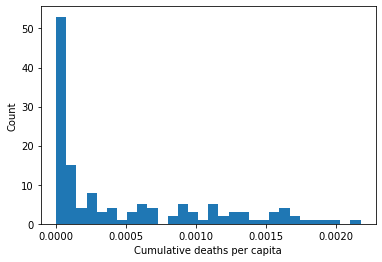

In [12]:
plt.hist(covid_data["cdec_norm"], bins = 30)
plt.xlabel("Cumulative deaths per capita")
plt.ylabel("Count")
plt.show()

Both cumulative positive cases and deaths per capita are very right skewed, especially deaths.  

#### Scatterplot of normalized cumulative positive cases vs GDP per capita

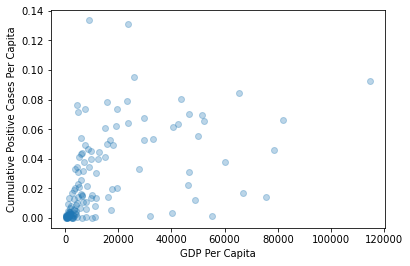

In [13]:
plt.scatter(x = covid_data["gdp_per_cap"],y = covid_data["cpos_norm"], alpha = 0.3)
plt.xlabel("GDP Per Capita")
plt.ylabel("Cumulative Positive Cases Per Capita")
plt.show()

To see a clearer trend we might have to plot this on a log graph or consider removing outliers.

#### Scatterplot of normalized cumulative deaths vs GDP per capita:

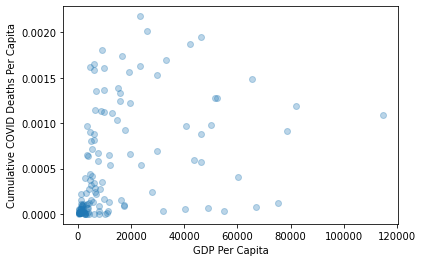

In [14]:
plt.scatter(x = covid_data["gdp_per_cap"],y = covid_data["cdec_norm"], alpha = 0.3)
plt.xlabel("GDP Per Capita")
plt.ylabel("Cumulative COVID Deaths Per Capita")
plt.show()

There is a similar issue with this graph.  Part of the issue is that GDP isn't normally distributed.

#### Scatterplot of normalized cumulative positive cases vs gini index:

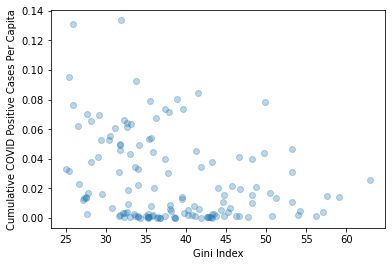

In [15]:
plt.scatter(x = covid_data["gini_index"],y = covid_data["cpos_norm"], alpha = 0.3)
plt.xlabel("Gini Index")
plt.ylabel("Cumulative COVID Positive Cases Per Capita")
plt.show()

Because this data is not normally distributed, it is difficult to discern trends from the scatterplot.  We may have to try other methods to find trends in gini data. 

#### Scatterplot of normalized cumulative deaths cases vs gini index:

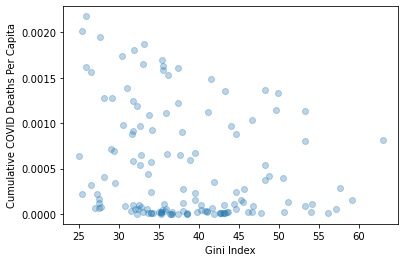

In [16]:
plt.scatter(x = covid_data["gini_index"],y = covid_data["cdec_norm"], alpha = 0.3)
plt.xlabel("Gini Index")
plt.ylabel("Cumulative COVID Deaths Per Capita")
plt.show()

## Questions for reviewers

- Should we be concerned about other possible external factors that may also influence a country’s positive COVID rate and death rate? For example, the density and the distribution of the population? Or the effect of government COVID policies?
- We are interested in two potential factors (GDP per capita and Gini Index) that may affect a country’s COVID data. What kind of test should we use to determine whether each or both factor(s) may have a correlation with positive and death rates? Maybe a Factorial (Two-Factor) Anova Test? Should we also test both the main effects and the interaction effects?
- What type(s) of graph do you recommend us to use for our particular research questions?
- Does the scope of our project seem too small or too large?
